<p>
<div style="text-align: justify">
    Several enzymatic reactions sucha as 1-Deoxy-d-xylulose-5-phosphate reductoisomerase (DXR), 4-hydroxy-3-methylbut-2-enyl diphosphate reductase (IspH) and squalene synthase (SQS) are documented to be heavily dependent on the presence of NADPH as a cofactor as illustrated on the figure shown below, thus emphasizing the importance of having NADPH/NADP+ ratio in squalene synthesis as indicated by the articles [36, 37].
</div>
</p>

<div class="csl-entry">
    [36] Yajima, S., Hara, K., Iino, D., Sasaki, Y., Kuzuyama, T., Ohsawa, K., &#38; Seto, H. (2007). F63, 466-470 Acta Crystallographica Section F. <i>Structure Communications 466 Acta Cryst</i>. https://doi.org/10.1107/ 
    <p>
    [37] Xiao, Y., Chu, L., Sanakis, Y., &#38; Liu, P. (2009). Revisiting the IspH catalytic system in the deoxyxylulose phosphate pathway: Achieving high activity. <i>Journal of the American Chemical Society</i>, <i>131</i>(29), 9931–9933. https://doi.org/10.1021/
</div>

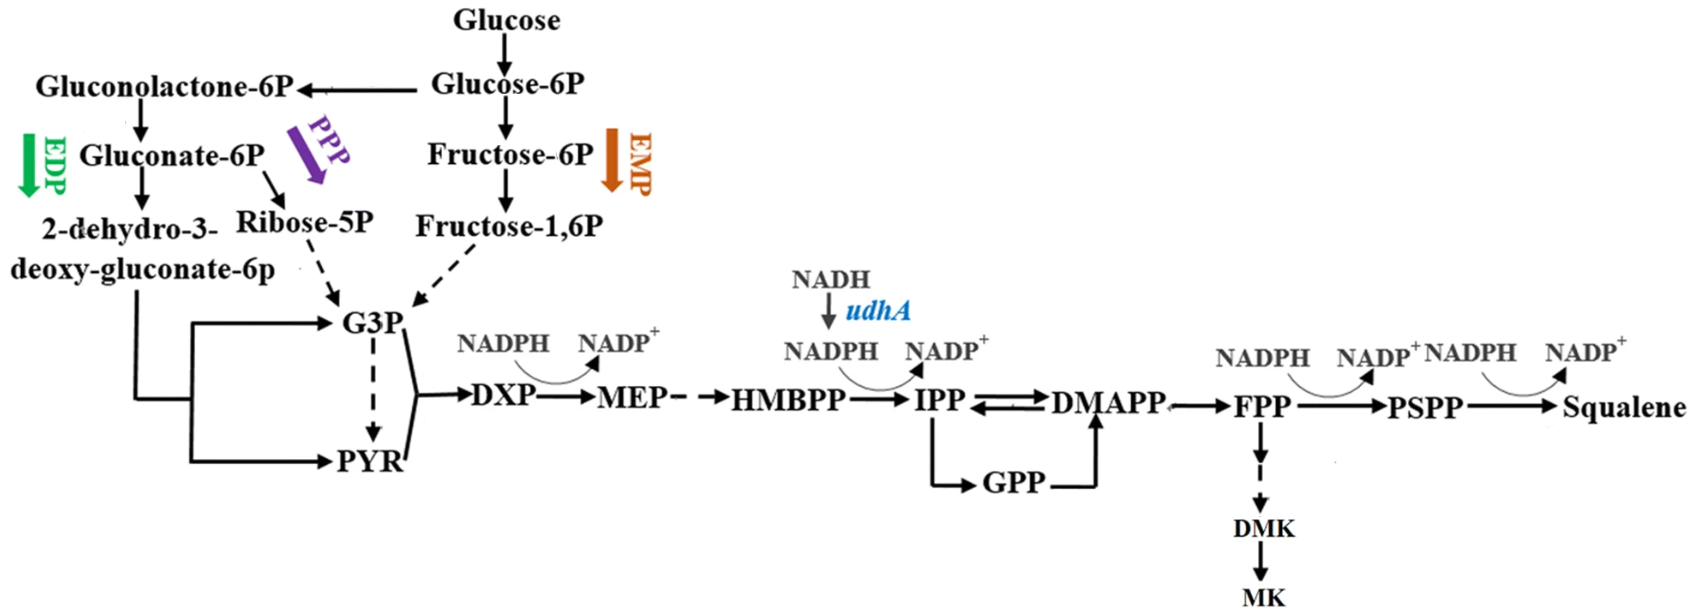

   [27] Xu, W., Yao, J., Liu, L., Ma, X., Li, W., Sun, X., &#38; Wang, Y. (2019). Improving squalene production by enhancing the NADPH/NADP+ ratio, modifying the isoprenoid-feeding module and blocking the menaquinone pathway in <i>Escherichia coli</i>. <i>Biotechnology for Biofuels</i>, <i>12</i>(1), 1–9. https://doi.org/10.1186/
</div>

<p>
<div style="text-align: justify">
    As a proof of concept, heterologous expression of soluble pyridine nucleotide transhydrogenase (UdhA), enzyme which catalyzes the reversible hydride transfer between NAD(H) and NADP(H) to maintain cofactor homeostasis [26], showed to increase overall squalene production through increasing the NADPH/NADP raio in <i>Escherichia coli</i> [27]. A further increase NADP(H)/NADP+ can be achieved through cofactor swapping in specific reactions. For instance, by swapping NADP(H)-to-NAD(H) in oxidation reactions and NADP+-to-NAD+ in reduction reactions, the reaction mechanism can be regulated to both minimize  NADP(H) consumption and optimize NADP(H) regeneration, thus increasing the NADP(H)/NADP+ availability for the reactions involved in squalene biosynthesis. Hence, this section is dedicated to test and determine possible cofactor swap targets in <i>Synechocystis sp. PCC 6803</i> which can be regulated for further optimization of squalene production. In order to achive this, the model objective is set to be squalene synthesis under autotrophic medium conditions (CO<sub>2</sub> as a main carbon source) and potential cofactor swap targets are determined through analyzing the model reactions by using the "CofactorSwapOptimization" algorithm. After the analysis, several of the determined cofactor swap targets were tested by carrying out NADP(H)/NADP+ to NAD(H)/NAD+ swapping and the targets which resulted in negative and positive effect on the squalene synthesis were noted down. At the end, the cofactor targets with increased squalene production are gathered in a separate notebook (PositiveCofTargets.ipynb) and used to determine the overall increase in squalene production which resulted in an increase in squalene production and biomass growth. 
    </div>
    </p>

<div class="csl-entry">
   [26] Sánchez, A. M., Andrews, J., Hussein, I., Bennett, G. N., &#38; San, K. Y. (2006). Effect of Overexpression of a Soluble Pyridine Nucleotide Transhydrogenase (UdhA) on the Production of Poly(3-hydroxybutyrate) in <i>Escherichia coli</i>. <i>Biotechnology Progress</i>, <i>22</i>(2), 420–425. https://doi.org/10.1021/BP050375U
    <p>
   [27] Xu, W., Yao, J., Liu, L., Ma, X., Li, W., Sun, X., &#38; Wang, Y. (2019). Improving squalene production by enhancing the NADPH/NADP+ ratio, modifying the isoprenoid-feeding module and blocking the menaquinone pathway in <i>Escherichia coli</i>. <i>Biotechnology for Biofuels</i>, <i>12</i>(1), 1–9. https://doi.org/10.1186/
</div>

In [1]:
# Packages
from cameo.strain_design.heuristic.evolutionary.objective_functions import product_yield
from cameo.strain_design.heuristic.evolutionary_based import CofactorSwapOptimization
from cobra.io import read_sbml_model, write_sbml_model
from cobra import Reaction, Metabolite

In [2]:
# Loading of the model
model_orig = read_sbml_model('iJN678mod.xml')
model = model_orig.copy()

In [3]:
# Calculate max biomass and squalene production
with model:
    base_max_growth = model.slim_optimize()
    model.objective = model.reactions.SQLS
    base_max_production = model.slim_optimize()
    print("------------------------------------------------------------")
    print("Max biomass and squalene formation under normal growth rate")
    print("------------------------------------------------------------")
    print("Max biomass growth:", base_max_growth, "/h")
    print("Max squalene production:", base_max_production, "mmol/gdcw/h") 

------------------------------------------------------------
Max biomass and squalene formation under normal growth rate
------------------------------------------------------------
Max biomass growth: 0.06314995695015085 /h
Max squalene production: 0.10740489130434779 mmol/gdcw/h


In [16]:
model.solver = "glpk" 

In [17]:
# Specify biomass growth rate
biomass = model.reactions.BIOMASS_Ec_SynAuto.lower_bound = 0.04859441594166733
# Specify model objective towards squalene biosynthesis
demand = model.reactions.get_by_id("SQLS")
model.objective = demand

In [18]:
# Max biomass and squalene production after objective change
with model:
    base_max_growth = model.slim_optimize()
    model.objective = model.reactions.SQLS
    base_max_production = model.slim_optimize()
    print("------------------------------------------------------------")
    print("Max biomass and squalene formation under optimal growth rate")
    print("------------------------------------------------------------")
    print("Max biomass growth:", base_max_growth, "/h")
    print("Max squalene production:", base_max_production, "mmol/gdcw/h")

------------------------------------------------------------
Max biomass and squalene formation under optimal growth rate
------------------------------------------------------------
Max biomass growth: 0.019782378757622777 /h
Max squalene production: 0.019782378757622777 mmol/gdcw/h


In [19]:
# State the product yield calculation
py = product_yield(model.reactions.SQLS, model.reactions.EX_co2_e)
#py = product_yield(model.reactions.SQLS, model.reactions.EX_glc__D_e)
#py = product_yield(model.reactions.SQLS, model.reactions.BIOMASS_Ec_SynAuto)

If needed, you can set different co-factor pairs by adding the parameter **cofactor_id_swaps=([from], [to])** which requires the metabolite identifiers in the model of the pairs that you want to swap.

Determine the co-factors in our model:

- NADH   = nadh_c
- NAD+   = nad_c
- NADPH  = nadph_c
- NADP+  = nadp_c

In [20]:
# To swap NADPH to NADH, add "cofactor_id_swaps=(['nad_c', 'nadh_c'], ['nadp_c', 'nadph_c'])" 
# inside the "CofactorSwapOptimization()"

# Remove "#" in front of the codes below to run the cell 

#optswap = CofactorSwapOptimization(model=model, objective_function=py, plot=True, cofactor_id_swaps=(['nad_c', 'nadh_c'], ['nadp_c', 'nadph_c']))
#optswap = CofactorSwapOptimization(model = model, objective_function = py)

In [21]:
# Record possible co-factor swap targets and how long it takes to determine them

# Remove "#" in front of the codes below to run the cell 

#%time
#result = optswap.run(max_size=5)
#result

# Playing with co-factor swap targets

In [22]:
# Summary of some of the tested co-factor targets obtained from "result" variable 
# which had negative and positive influence on the biomass and squalene production.

# Some of the tested targets are determined by using glucose as a carbon instead 
# of carbon dioxide.

#-----------------------#
# NEGATIVE IMPROVEMENTS
#-----------------------#
#model.reactions.GLYCL
#model.reactions.ICDHyr
#model.reactions.DHDPRy
#model.reactions.SHK3Dr
#model.reactions.MDH
#model.reactions.ASAD

#----------------------#
# POSITIVE IMPROVEMENTS
#----------------------#
#model.reactions.GAPD
#model.reactions.FNOR
#model.reactions.EAR120y
#model.reactions.EAR60y

# Positive improvements

In [23]:
# Implement the jupyter notebook containing all positive co-factor swap targets 
%run PositiveCofTargets.ipynb 

# Check the swap effect

In [24]:
# Max biomass and squalene production after objective change
with model:
    swap_max_growth = model.slim_optimize()
    model.objective = model.reactions.SQLS
    swap_max_production = model.slim_optimize()
    print()
    print("----------------------------------------------------------")
    print("Max biomass and squalene formation after cofactor swapping")
    print("----------------------------------------------------------")
    print("Max biomass growth:", swap_max_growth, "/h")
    print("Max squalene production:", swap_max_production, "mmol/gdcw/h")


----------------------------------------------------------
Max biomass and squalene formation after cofactor swapping
----------------------------------------------------------
Max biomass growth: 0.02014031656632475 /h
Max squalene production: 0.02014031656632475 mmol/gdcw/h


In [25]:
# Calcualte the percentage change in max biomass growth and squalene production
print()
print("----------------------------------------------------------")
print("Percentage change in biomass and squalene formation")
print("----------------------------------------------------------")
print("Change in max boimass growth:", round((swap_max_growth-(base_max_growth))/(base_max_growth) * 100, 2), "%")
print("Change in max squalene production:", round((swap_max_production-(base_max_production))/(base_max_production) * 100, 2), "%")


----------------------------------------------------------
Percentage change in biomass and squalene formation
----------------------------------------------------------
Change in max boimass growth: 1.81 %
Change in max squalene production: 1.81 %
